# <div align='center' id="top"> Data Preparation  </div>

## `Table of contents`

- ###  <a href="#data_exp">Exploration & Filtration</a>
- ###  <a href="#data_vis">Visualization</a>
- ###  <a href="#data_pre">Preprocessing</a>
- ###  <a href="#data_spl">Splitting</a>

### <div align='center' id="data_exp"> Exploration & Filtration  </div>



<div align = "right"><a href="#top" > Back to top </a></div>

`all info but age and gender are removed for simplicity`

In [ ]:
import os
import shutil

source_folder = "Data"  
destination_folder = "renamed_utkface"

os.makedirs(destination_folder, exist_ok=True)

# Dictionary to keep track of unique filenames
counter = {}

for filename in os.listdir(source_folder):
    if filename.endswith(".jpg"):
        parts = filename.split("_")
        if len(parts) >= 2:
            age = parts[0]
            gender = parts[1]
            base_name = f"{age}_{gender}"

            # Count how many times this base_name has occurred
            counter[base_name] = counter.get(base_name, 0) + 1
            new_name = f"{base_name}_{counter[base_name]}.jpg"

            src = os.path.join(source_folder, filename)
            dst = os.path.join(destination_folder, new_name)

            shutil.copy(src, dst) 


Images renamed and copied to 'renamed_utkface' successfully.


In [16]:
import os
from collections import defaultdict
from tabulate import tabulate  

folder_path = "renamed_utkface"


total_images = 0
below_11 = 0
above_80 = 0
age_counts = defaultdict(int)
gender_counts = { "0": 0, "1": 0 }  # 0: male, 1: female

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        total_images += 1
        parts = filename.split("_")
        if len(parts) >= 2:
            age = int(parts[0])
            gender = parts[1]

            # Count age-based groups
            if age <= 10:
                below_11 += 1
            if age >= 81:
                above_80 += 1

            # Count age frequency
            age_counts[age] += 1

            # Count gender
            if gender in gender_counts:
                gender_counts[gender] += 1

# Determine age with most and fewest images
most_common_age = max(age_counts, key=age_counts.get)
least_common_age = min(age_counts, key=age_counts.get)

table = [
    ["Total Images", total_images],
    ["Images Age ≤ 10", below_11],
    ["Images Age ≥ 81", above_80],
    [f"Most Common Age ({most_common_age})", age_counts[most_common_age]],
    [f"Least Common Age ({least_common_age})", age_counts[least_common_age]],
    ["Male Images (gender=0)", gender_counts["0"]],
    ["Female Images (gender=1)", gender_counts["1"]],
]

print(tabulate(table, headers=["Category", "Count"], tablefmt="grid"))


+--------------------------+---------+
| Category                 |   Count |
+==========================+=========+
| Total Images             |   23708 |
+--------------------------+---------+
| Images Age ≤ 10          |    3218 |
+--------------------------+---------+
| Images Age ≥ 81          |     540 |
+--------------------------+---------+
| Most Common Age (26)     |    2197 |
+--------------------------+---------+
| Least Common Age (103)   |       1 |
+--------------------------+---------+
| Male Images (gender=0)   |   12391 |
+--------------------------+---------+
| Female Images (gender=1) |   11317 |
+--------------------------+---------+


This gives the following insights: 
- all 81 or more and 10 or less shall be removed  `data would be now (11-80)`
- the data is well balanced regarding male/female task  

In [19]:
import os

folder_path = "renamed_utkface"

removed = 0

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        parts = filename.split("_")
        if len(parts) >= 2:
            age = int(parts[0])
            if age <= 10 or age >= 81:
                os.remove(os.path.join(folder_path, filename))
                removed += 1
print(f"Removed {removed} images with age ≤ 10 or ≥ 81.")


Removed 0 images with age ≤ 10 or ≥ 81.


### <div align='center' id="data_vis"> Visualization  </div>



<div align = "right"><a href="#top" > Back to top </a></div>

defaultdict(<class 'int'>, {11: 65, 12: 130, 13: 81, 14: 157, 15: 177, 16: 247, 17: 158, 18: 262, 19: 98, 20: 284, 21: 346, 22: 395, 23: 426, 24: 859, 25: 734, 26: 2197, 27: 615, 28: 918, 29: 570, 30: 724, 31: 350, 32: 664, 33: 143, 34: 409, 35: 880, 36: 483, 37: 293, 38: 325, 39: 266, 40: 526, 41: 132, 42: 266, 43: 157, 44: 100, 45: 440, 46: 153, 47: 170, 48: 153, 49: 148, 50: 381, 51: 138, 52: 232, 53: 241, 54: 353, 55: 268, 56: 236, 57: 97, 58: 271, 59: 82, 60: 293, 61: 161, 62: 125, 63: 103, 64: 50, 65: 259, 66: 77, 67: 94, 68: 100, 69: 56, 70: 147, 71: 33, 72: 98, 73: 63, 74: 32, 75: 148, 76: 58, 77: 28, 78: 69, 79: 23, 80: 133})


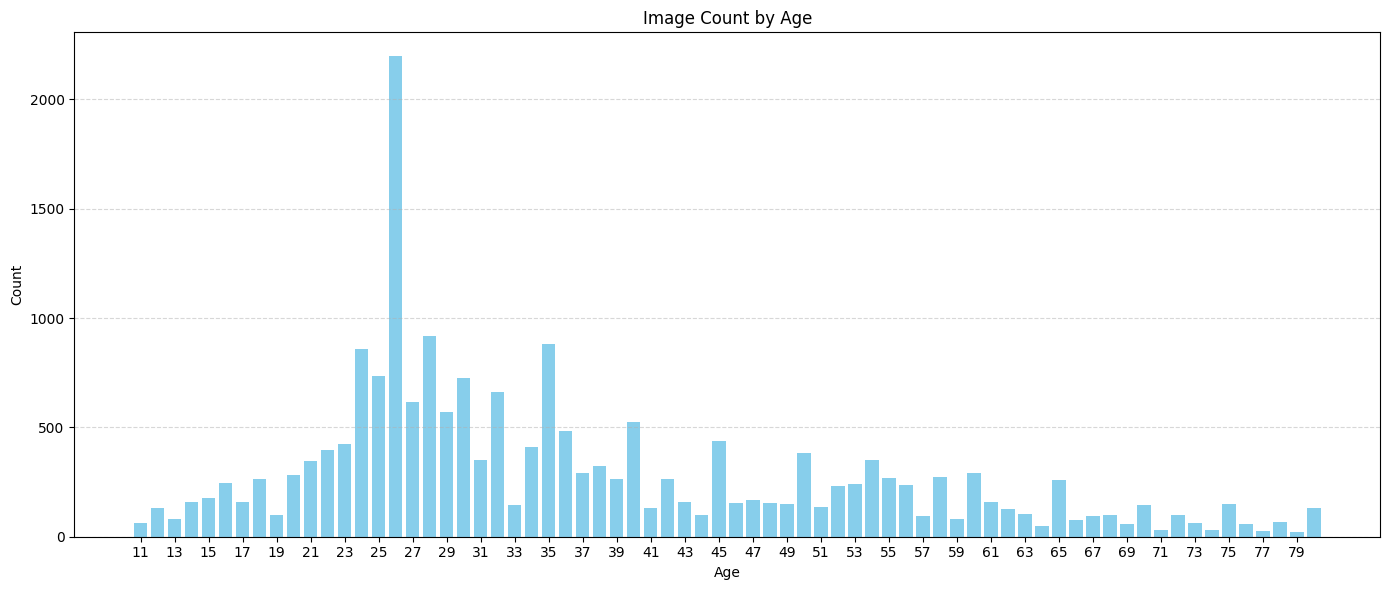

In [20]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

folder_path = "renamed_utkface"

# Re-count image ages
age_counts = defaultdict(int)

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        parts = filename.split("_")
        if len(parts) >= 2:
            age = int(parts[0])
            if 11 <= age <= 80:  # Only include cleaned range
                age_counts[age] += 1
print(age_counts)
# --------------- Plot A: Each age ----------------
ages = sorted(age_counts.keys())
counts = [age_counts[age] for age in ages]

plt.figure(figsize=(14, 6))
plt.bar(ages, counts, color='skyblue')
plt.title("Image Count by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(min(ages), max(ages)+1, 2))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




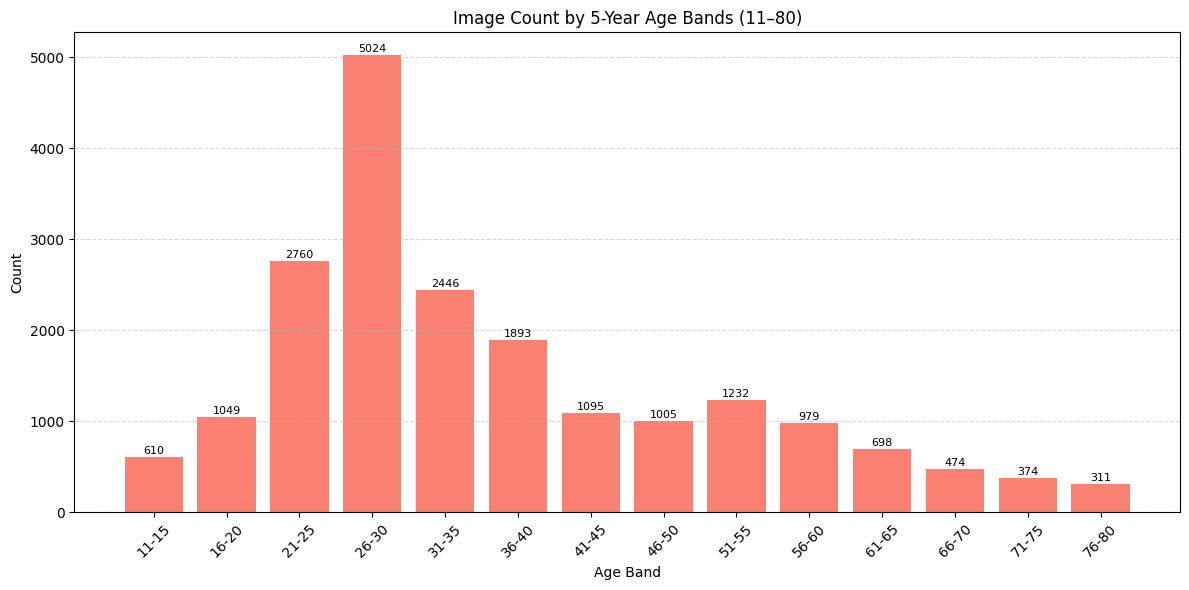

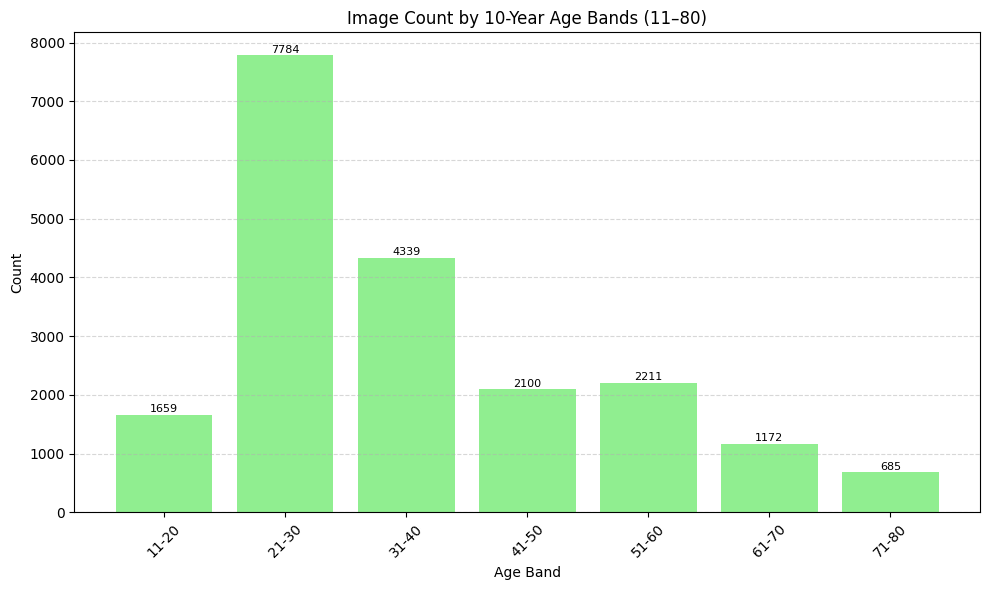

In [22]:
# --------------- Plot B: 5-year bands ------------
bands_5 = defaultdict(int)

for age, count in age_counts.items():
    # Group into 5-year bands (11–15, 16–20, ..., 76–80)
    lower = ((age - 11) // 5) * 5 + 11
    upper = lower + 4
    band = f"{lower}-{upper}"
    bands_5[band] += count

bands_5 = dict(sorted(bands_5.items(), key=lambda x: int(x[0].split("-")[0])))

plt.figure(figsize=(12, 6))
plt.bar(bands_5.keys(), bands_5.values(), color='salmon')
for i, v in enumerate(bands_5.values()):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8)
plt.title("Image Count by 5-Year Age Bands (11–80)")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --------------- Plot C: 10-year bands -----------
bands_10 = defaultdict(int)

for age, count in age_counts.items():
    # Group into 10-year bands (11–20, 21–30, ..., 71–80)
    lower = ((age - 11) // 10) * 10 + 11
    upper = lower + 9
    band = f"{lower}-{upper}"
    bands_10[band] += count

bands_10 = dict(sorted(bands_10.items(), key=lambda x: int(x[0].split("-")[0])))

plt.figure(figsize=(10, 6))
plt.bar(bands_10.keys(), bands_10.values(), color='lightgreen')
for i, v in enumerate(bands_10.values()):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8)
plt.title("Image Count by 10-Year Age Bands (11–80)")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

from the above plots we see that: 
- to do a age prediction , a lot of proper augmentation should be done to address the imbalnce `specially in the 20s band`
- Intead of Doing a band based classifcation across different bands , we shall carry on a Regression based age classification aiming ~5-7 error which is reasonable across different previous facial age prediction work 
`giving the fact that perfect human eye stimate age through faces at a ~4 error rate`

### <div align='center' id="data_pre"> Preprocessing  </div>



<div align = "right"><a href="#top" > Back to top </a></div>

- resize all images to 112x112
- grayscale images and apply 3x3 median filters to reduce the noise

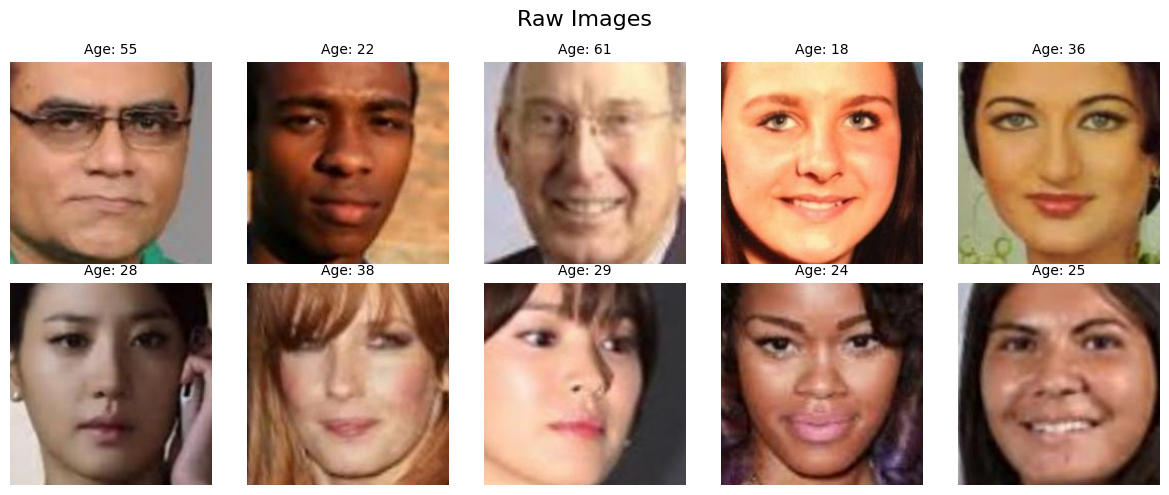

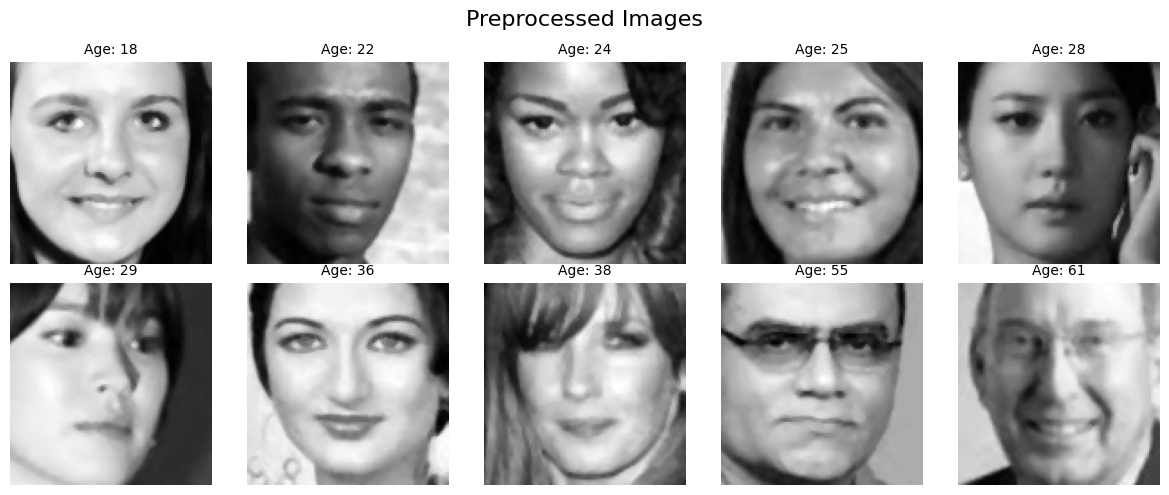

In [7]:
import os
import random
import cv2
import matplotlib.pyplot as plt


input_folder = "renamed_utkface"
output_folder = "preprocessed_data"
os.makedirs(output_folder, exist_ok=True)


def show_images(images, titles, main_title):
    plt.figure(figsize=(12, 5))
    for i, (img, age) in enumerate(zip(images, titles)):
        plt.subplot(2, 5, i + 1)
        cmap = 'gray' if len(img.shape) == 2 else None
        plt.imshow(img, cmap=cmap)
        plt.title(f"Age: {age}", fontsize=10)
        plt.axis('off')
    plt.suptitle(main_title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Select 10 random filenames
all_filenames = [f for f in os.listdir(input_folder) if f.endswith(".jpg")]
random_filenames = random.sample(all_filenames, 10)

# Step 1: Show raw images
raw_images = []
raw_ages = []

for fname in random_filenames:
    age = fname.split("_")[0]
    img_path = os.path.join(input_folder, fname)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    raw_images.append(img_rgb)
    raw_ages.append(age)

show_images(raw_images, raw_ages, "Raw Images")

# Step 2: Preprocess and save all images
preprocessed_images = []
preprocessed_ages = []

for fname in all_filenames:
    img_path = os.path.join(input_folder, fname)
    save_path = os.path.join(output_folder, fname)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (112, 112))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(img, 3)

    # Save
    cv2.imwrite(save_path, img)

    # If this is one of the 10 random samples, keep for visualization
    if fname in random_filenames:
        preprocessed_images.append(img)
        age = fname.split("_")[0]
        preprocessed_ages.append(age)

# Step 3: Show preprocessed images
show_images(preprocessed_images, preprocessed_ages, "Preprocessed Images")


### <div align='center' id="data_spl"> Splitting  </div>



<div align = "right"><a href="#top" > Back to top </a></div>

In [ ]:
import os
import shutil

# Source folder
src_folder = "preprocessed_data"


# 2. GENDER SPLIT
gender_folder = "gender_data"
male_folder = os.path.join(gender_folder, "male")
female_folder = os.path.join(gender_folder, "female")
os.makedirs(male_folder, exist_ok=True)
os.makedirs(female_folder, exist_ok=True)

# 3. AGE
age_folder = "age_data"
os.makedirs(age_folder, exist_ok=True)

# Process each image
for filename in os.listdir(src_folder):
    if not filename.endswith(".jpg"):
        continue

    parts = filename.replace(".jpg", "").split("_")
    if len(parts) < 2:
        print(f"Skipping malformed filename: {filename}")
        continue

    try:
        age = int(parts[0])
        gender = int(parts[1])
    except ValueError:
        print(f"Skipping invalid numbers in filename: {filename}")
        continue

    src_path = os.path.join(src_folder, filename)


    # ---------- 2. GENDER SPLIT ----------
    if gender == 0:
        shutil.copy2(src_path, os.path.join(male_folder, filename))
    elif gender == 1:
        shutil.copy2(src_path, os.path.join(female_folder, filename))

    # ---------- 3. AGE SPLIT ----------
    if 11 <= age <= 80:
        age_path = os.path.join(age_folder, str(age))
        os.makedirs(age_path, exist_ok=True)
        shutil.copy2(src_path, os.path.join(age_path, filename))

print("✅ Data successfully split into folders.")


✅ Data successfully split into folders.


After all preprocssing and intial splitting had beend done:


it's time to split the each data's task into `train-test-validation` then applying proper `augmentation` into each `train` data to help improving the performance of the models when trained  